# 8) Selenium

## 8.1) installation (possibilité : passer par le navigator 'Anaconda navigator)

### 8.1.1) installer l'interface python

In [163]:
!pip install selenium

  Using cached selenium-3.141.0-py2.py3-none-any.whl (904 kB)


### 8.1.2) télécharger l'application

1. Cf google : selenium


https://selenium-python.readthedocs.io/installation.html#downloading-python-bindings-for-selenium

https://sites.google.com/a/chromium.org/chromedriver/downloads

2. regardez votre version de chrome (chrome / à propos = > v 77.xxx ) 

3. Télécharger la mêle  version que le Chrome installé sur votre PC

https://chromedriver.storage.googleapis.com/index.html?path=77.0.3865.40/

4. Dézipper, et mettre l'application "driver" dans le même répertoire que le notebook (sinon noter le répertoire dans une variabe, et donner le chemin d'accès à python)

# 8.2) instanciation de selenium

In [275]:
import selenium
from selenium import webdriver
path   = "./chromedriver"
driver = webdriver.Chrome(executable_path=path)

## 8.3) se connecter à un site web avec user/pwd : instagram

In [276]:
url_insta = "https://www.instagram.com/accounts/login/?hl=fr&source=auth_switcher"
driver.get(url_insta)

In [277]:
USER_ID       = "ingenieur_5a"
USER_PASSWORD = "instagram_esilv"

In [278]:
css_selector = "input[name='username']"
input_name = driver.find_element_by_css_selector(css_selector)
input_name.send_keys(USER_ID)

In [279]:
css_selector = "input[name='password']"
input_name = driver.find_element_by_css_selector(css_selector)
input_name.send_keys(USER_PASSWORD)

In [280]:
css_selector = "button[type='submit']"
button       = driver.find_element_by_css_selector(css_selector)
button.click()

## 8.4) activer un bouton (pour faire disparaître la pop up en entrée) 

In [282]:
css_selector = "body > div.RnEpo.Yx5HN > div > div > div.mt3GC > button.aOOlW.bIiDR"
css_selector = "body > div.RnEpo.Yx5HN > div > div > div > div.mt3GC > button.aOOlW.bIiDR"
button       = driver.find_element_by_css_selector(css_selector)
button.click()

## 8.5) chercher des photos sur un sujet via la search bar

In [283]:
hashtag = '#basketball'

In [294]:
css_selector = "input[placeholder='Rechercher']"

In [295]:
search_bar = driver.find_element_by_css_selector(css_selector)

##### Clear : nettoyer une zone d'input

In [296]:
search_bar.clear()

In [297]:
search_bar.send_keys(hashtag)

#### utiliser les clefs claviers pour faire "entrer" dans la barre de recherche

In [298]:
from selenium.webdriver.common.keys import Keys 

In [299]:
search_bar.send_keys(Keys.ENTER)

## sometimes we have to press multiple times Enter...
import time
time.sleep(3)
for i in range(3):
    try: search_bar.send_keys(Keys.ENTER)
    except: pass


## 8.6) enregistrer les photos

### 8.6.1) récupérer les urls des photos

In [246]:
css_selector = "img"
images       = driver.find_elements_by_css_selector(css_selector)
img_srcset   = [image.get_attribute('srcset') for image in images]
urls_images  = [x.split(" ")[0] for x in img_srcset]

In [247]:
urls_images[:10]

['',
 'https://scontent-cdg2-1.cdninstagram.com/v/t51.2885-15/e35/c83.0.1274.1274a/s150x150/120137112_329485331617259_7991231939222573896_n.jpg?_nc_ht=scontent-cdg2-1.cdninstagram.com&_nc_cat=111&_nc_ohc=JZIKH3G9QFEAX_jdIQB&_nc_tp=16&oh=30501bb922f79b608908eb7321601322&oe=5F9B0A64',
 'https://scontent-cdg2-1.cdninstagram.com/v/t51.2885-15/e35/s150x150/120342924_187941052847347_5703012638260979556_n.jpg?_nc_ht=scontent-cdg2-1.cdninstagram.com&_nc_cat=107&_nc_ohc=Lut2leYiRpYAX9-w0eA&_nc_tp=15&oh=5c05256a1268027b0f29eedc8b4e575f&oe=5F9AE9F6',
 'https://scontent-cdt1-1.cdninstagram.com/v/t51.2885-15/e35/c69.0.1301.1301a/s150x150/120261890_786277408853662_1110035994686432889_n.jpg?_nc_ht=scontent-cdt1-1.cdninstagram.com&_nc_cat=110&_nc_ohc=-XxiAhB3ZJEAX8EbaVs&_nc_tp=16&oh=c1d5ba7c073d8ddb6344193d29006240&oe=5F9C1116',
 'https://scontent-cdt1-1.cdninstagram.com/v/t51.2885-15/e35/c0.169.1349.1349a/s150x150/120199619_633364204029877_6024221656692843415_n.jpg?_nc_ht=scontent-cdt1-1.cdninstagram

In [248]:
urls_images = list(filter(lambda url: url.startswith("http"), urls_images))

### 8.6.2) enregistrer chaque photo via urllib.request

In [249]:
from urllib.request import urlretrieve as download

In [250]:
[download(url, f"image_{indice}.jpg") for indice, url in enumerate(urls_images[1:])]

[('image_0.jpg', <http.client.HTTPMessage at 0x1a2a2b2dd0>),
 ('image_1.jpg', <http.client.HTTPMessage at 0x1a2a2b52d0>),
 ('image_2.jpg', <http.client.HTTPMessage at 0x1a2a1eeb10>),
 ('image_3.jpg', <http.client.HTTPMessage at 0x1a2a2b28d0>),
 ('image_4.jpg', <http.client.HTTPMessage at 0x1a2a2b5890>),
 ('image_5.jpg', <http.client.HTTPMessage at 0x1a2a2b5dd0>),
 ('image_6.jpg', <http.client.HTTPMessage at 0x1a2a2b7310>),
 ('image_7.jpg', <http.client.HTTPMessage at 0x1a2a2b7810>),
 ('image_8.jpg', <http.client.HTTPMessage at 0x1a2a2b7d10>),
 ('image_9.jpg', <http.client.HTTPMessage at 0x1a2a2ba210>),
 ('image_10.jpg', <http.client.HTTPMessage at 0x1a2a2ba710>),
 ('image_11.jpg', <http.client.HTTPMessage at 0x1a2a2bac10>),
 ('image_12.jpg', <http.client.HTTPMessage at 0x1a2a2bc150>),
 ('image_13.jpg', <http.client.HTTPMessage at 0x1a2a2bc650>),
 ('image_14.jpg', <http.client.HTTPMessage at 0x1a2a2bcb50>),
 ('image_15.jpg', <http.client.HTTPMessage at 0x1a2a2c0090>),
 ('image_16.jpg', 

### 8.6.3) tester que les photos sont bien enregistrées :

In [251]:
import PIL

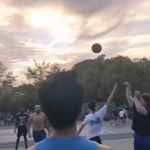

In [252]:
PIL.Image.open(f"image_24.jpg") 

# 9) usage avancé de Sélénium

## 9.1)  Imports de packages

In [303]:
from selenium import webdriver #the webdriver package
from selenium.webdriver.common.by import By #use the method to select
from selenium.webdriver.common.keys import Keys 

from selenium.webdriver.support.ui import WebDriverWait #enables to wait until condition is fullfilled or just until a timeout exception is returned
from selenium.webdriver.support import expected_conditions as ec #enables to create the conditions
from selenium.common.exceptions import TimeoutException #enables to retrieve the exceptions type
from selenium.common.exceptions import NoSuchElementException #enables to retrieve the exceptions type

## 9.2) exectuter du javascript

In [304]:
driver.execute_script("return document.body.scrollHeight")

4119

In [305]:
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

## 9.3) attendre

In [306]:
## All photos that appeared or will appear are located in div[class='v1Nh3 kIKUG  _bz0w']m

In [307]:
WebDriverWait(driver, timeout=10).until(ec.visibility_of_all_elements_located((By.CSS_SELECTOR, "div[class='v1Nh3 kIKUG  _bz0w']")))

[<selenium.webdriver.remote.webelement.WebElement (session="8349fe748811c60e17c0ca16b3f4955f", element="7c16c623-6340-4259-9089-1204513f35c2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="8349fe748811c60e17c0ca16b3f4955f", element="cdad28ae-f974-4eac-b7cd-798f7efb07c6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="8349fe748811c60e17c0ca16b3f4955f", element="2a84f626-3c12-4ad8-b48c-6317538b3167")>,
 <selenium.webdriver.remote.webelement.WebElement (session="8349fe748811c60e17c0ca16b3f4955f", element="fd8360b4-bb5d-4a0d-b40f-66c3408758c9")>,
 <selenium.webdriver.remote.webelement.WebElement (session="8349fe748811c60e17c0ca16b3f4955f", element="a6042b17-402f-4a26-b730-bdb8ace1be37")>,
 <selenium.webdriver.remote.webelement.WebElement (session="8349fe748811c60e17c0ca16b3f4955f", element="31181927-ee02-4cc3-a46b-d02e60298be9")>,
 <selenium.webdriver.remote.webelement.WebElement (session="8349fe748811c60e17c0ca16b3f4955f", element="7b3f4418-d2ec-4299-9ad0-54

# 9.Bonus.1)  décorateurs

In [312]:
class NbCallFunction:
    """ This is a decorator to count the number of times a function has been called
    It will be used to retrieve the image number to put it in working directory"""
    def __init__(self, function):
        self.callNumber = 0
        self.function = function
    def __call__(self, *args, **kwargs):
        ## onCall
        self.callNumber += 1
        return self.function(*args, **kwargs)

# 9.Bonus.2) Example d'usage d'un décorateur

In [314]:
@NbCallFunction
def helloworld():
    print('hello-world')
helloworld.callNumber

0

In [315]:
helloworld()
helloworld.callNumber

hello-world


1

## 9.4) une fonction pour enregistrer les images téléchargées

In [316]:
@NbCallFunction
def download_img_from_link(string_url_img, hashtag_name):
    """ This function retrieve all the photos from the visible window"""
    import os
    import requests as req
    if not os.path.exists('data/'):
        os.mkdir('data/')
    string_path = 'data/'+ hashtag_name.lstrip('#') + str(download_img_from_link.callNumber) + '.jpg'
    with open(string_path, 'wb') as file:
        response = req.get(string_url_img)
        print(response) if (not response.ok) else file.write(response.content)

# 9.5) Scroll down sur instagram pour récupérer les photos

In [317]:
##==== the while loop idea using the last_height and new_height is from @Artjom B. on Stackoverflow \
##==== i find it quite straightforward and useful ====##
SLEEP_EACH_SCROLL = 3
last_height       = driver.execute_script("return document.body.scrollHeight") # Get scroll height executing js script
count, limit      = 0, 10 # if we want to stop
s = set()

import regex as re
while count < limit:
    ## Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(SLEEP_EACH_SCROLL)
     
    ## Retrieve the divs list
    all_divs = driver.find_elements(By.CSS_SELECTOR, "div[class='v1Nh3 kIKUG  _bz0w']")
    
    ## important: in case the visible window overlapp with the former one, we don't want photos to get scrapped twice (so we say not in 's')
    selected_divs = [x for x in all_divs if x not in s]
    
    ## Retrieve each image srcset attribute in each div in the divs list
    img_srcset = [div.find_element(By.CSS_SELECTOR, "img").get_attribute('srcset') for div in selected_divs]
    
    ## Retrieve the correct image url from image srcset list
    pattern = re.compile('^http\S+')
    string_url_imgs = [re.match(pattern=pattern, string=x).group() for x in img_srcset]
    
    for string_url_img in string_url_imgs:
        download_img_from_link(string_url_img, hashtag)
        
    ## Calculate new scroll height and compare with last scroll height 
    ## ... (if the scrolling actually changed something)
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height
    count += 1 # count will be used for pagination afterwards
    
    s = set(all_divs) # Saving this list to avoid downloading again the same photos
    print("scrolling number : " + str(count) + " on limit : " + str(limit))
    print("number of photos downloaded : " + str(download_img_from_link.callNumber))
    if download_img_from_link.callNumber > 10000:
        break

scrolling number : 1 on limit : 10
number of photos downloaded : 33
scrolling number : 2 on limit : 10
number of photos downloaded : 57


# 9.6) lister les images reçues

In [328]:
import os

In [330]:
list(os.walk("./data"))

[('./data',
  [],
  ['basketball9.jpg',
   'basketball12.jpg',
   'basketball13.jpg',
   'basketball8.jpg',
   'basketball11.jpg',
   'basketball39.jpg',
   'basketball38.jpg',
   'basketball10.jpg',
   'basketball28.jpg',
   'basketball14.jpg',
   'basketball15.jpg',
   'basketball29.jpg',
   'basketball17.jpg',
   'basketball16.jpg',
   'basketball48.jpg',
   'basketball49.jpg',
   'basketball44.jpg',
   'basketball50.jpg',
   'basketball51.jpg',
   'basketball45.jpg',
   'basketball53.jpg',
   'basketball47.jpg',
   'basketball46.jpg',
   'basketball52.jpg',
   'basketball56.jpg',
   'basketball42.jpg',
   'basketball43.jpg',
   'basketball57.jpg',
   'basketball41.jpg',
   'basketball55.jpg',
   'basketball54.jpg',
   'basketball40.jpg',
   'basketball27.jpg',
   'basketball33.jpg',
   'basketball32.jpg',
   'basketball26.jpg',
   'basketball1.jpg',
   'basketball3.jpg',
   'basketball30.jpg',
   'basketball24.jpg',
   'basketball18.jpg',
   'basketball19.jpg',
   'basketball25.jpg